In [2]:
#load all packages
import tensorflow as tf
from tensorflow.keras import layers, models
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score
from keras import metrics
import keras.backend as K
from keras.utils import to_categorical, image_dataset_from_directory
import cv2
import glob
from tensorflow.python.client import device_lib


In [140]:
# load path of each file to a tf tensor. You have to add the path to the image folder \\* means all from a folder
train_paths = tf.data.Dataset.list_files("F:\\MRI_class\\data\\Alzheimer_Dataset2\\train\\*\\*",shuffle=True)
test_paths = tf.data.Dataset.list_files("F:\\MRI_class\\data\\Alzheimer_Dataset2\\test\\*\\*",shuffle=True)

In [260]:
# create a tensor containing the target and actual image as tensor. For that a single path
# is given to the function whic splits the path and takes the actual folder name as target.
# !!folder structure is IMPORTANT!!
# finally the image is read with tf.image and both, target and image are returned

# you can add more image processing to this function!
def make_dataset(path):
  target = tf.strings.split(path, os.sep)[-2]
  image = tf.image.decode_jpeg(tf.io.read_file(path))
  
  return image, target



In [261]:
# the defined function is used to process every entry of the initial path tensor.
# .map applies the function on every entry

train_data = train_paths.map(make_dataset)
test_data = test_paths.map(make_dataset)

In [263]:
t = tf.where()

tf.Tensor(b'NonDemented', shape=(), dtype=string)
tf.Tensor(b'NonDemented', shape=(), dtype=string)
tf.Tensor(b'NonDemented', shape=(), dtype=string)
tf.Tensor(b'VeryMildDemented', shape=(), dtype=string)


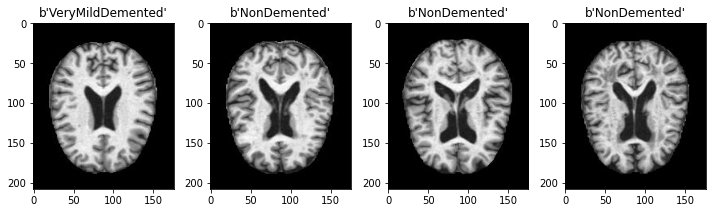

In [144]:
#visualization of couple brains
cols= 4
rows = 1
axes = []
fig = plt.figure(figsize=(10, 10))

loop = 0
for img, lab in train_data.take(4):

    axes.append(fig.add_subplot(rows, cols, loop+1) )
    subplot_title=(str(lab.numpy()))
    axes[-1].set_title(subplot_title) 
    loop += 1
    plt.imshow(img,cmap="gray")
    
fig.tight_layout()
plt.show()

In [162]:
mri_types = tf.feature_column.categorical_column_with_vocabulary_list(
      'Type', ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

In [241]:
t = train_data

In [242]:
for img,lab in t.take(2):
    if str(lab.numpy()) == "b'NonDemented'":
        print(str(lab.numpy()))
tf.map()        

b'NonDemented'
b'NonDemented'


In [218]:
train_data
tf.one_hot(train_data,4)

ValueError: Attempt to convert a value (<MapDataset element_spec=(TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>) with an unsupported type (<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>) to a Tensor.

ValueError: too many values to unpack (expected 2)

In [156]:
# making splits
trainset = train_data.take(int(len(train_data)*0.7))
valset = train_data.skip(int(len(train_data)*0.7))

In [161]:
trainset

<TakeDataset element_spec=(TensorSpec(shape=(None, None, None), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

In [224]:
#iniziating model architecture
model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(208, 176, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(50, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [225]:
#add dense layes to conv layers
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.3))
#model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(4, activation="softmax"))


In [20]:
#model.summary()

In [21]:
#EPOCHS = 100
#BATCH_SIZE = 100
#STEPS_PER_EPOCH = len(train_images)*0.6 // BATCH_SIZE


In [154]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
    0.001,
    decay_steps=STEPS_PER_EPOCH*100,
    decay_rate=1,
    staircase=False)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule, name='Adam')


NameError: name 'STEPS_PER_EPOCH' is not defined

In [229]:
t = tf.data.dataset(train_data)

AttributeError: module 'tensorflow._api.v2.data' has no attribute 'dataset'

In [226]:
#compiling the model architecture and start fit
keras.backend.clear_session()
model.compile(optimizer="Adam",
              loss="CategoricalCrossentropy",
              #loss="binary_crossentropy",
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])

with tf.device("/gpu:0"):
    history = model.fit(trainset,
                        
                        #epochs=EPOCHS, 
                        #batch_size=BATCH_SIZE,
                        #steps_per_epoch=STEPS_PER_EPOCH,
                        #shuffle=True,
                        validation_data=valset)
                    

ValueError: in user code:

    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "f:\alzheimer-classification\envwin\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes () and (None, 4) are incompatible


40/40 - 0s - loss: 2.8446 - accuracy: 0.6372 - precision: 0.6377 - recall: 0.6372 - get_f1: 0.6375 - 459ms/epoch - 11ms/step


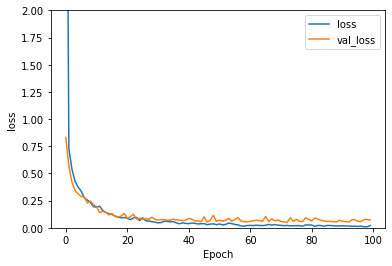

In [25]:
#print val vs accuracy

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')

test_loss, test_acc, test_prec, test_rec, test_f1  = model.evaluate(X_test,  y_test, verbose=2)

In [26]:
yyaX_test.shape

NameError: name 'yyaX_test' is not defined

In [ ]:
ddds
y_pred = model.predict(X_test)

NameError: name 'ddds' is not defined

: 

In [ ]:
#t=np.where(np.argmax(y_pred[0,:]), 1, 0)
y_pred[np.arange(len(y_pred)), y_pred.argmax(1)] = 1
x = np.argwhere(y_pred==1)
z = x[:,1]

: 

In [ ]:
xt = np.argwhere(y_test==1)
zt = xt[:,1]

: 

: 

In [ ]:
f1_score(zt,z,average="weighted")

0.5523447444261604

: 

In [ ]:
# get specific layer output - TAKES some time. Layer 7 is the output layer
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[7].output])
layer_output = get_layer_output([images_train])[0]

NameError: name 'images_train' is not defined

: 

In [ ]:
for i in layer_output:
    #if np.argmax(i) != 0:
    print(np.argmax(i))

0
0
0
0
1
2
0
0
1
0
0
1
0
0
1
0
0
0
0
2
0
0
0
0
1
0
0
0
1
3
0
1
1
2
1
0
0
1
1
1
2
0
2
1
0
1
0
1
1
1
1
0
0
2
2
0
1
0
0
0
1
0
0
0
0
0
2
0
0
0
0
0
0
1
0
2
1
2
0
0
1
1
0
0
2
0
1
0
0
0
2
0
1
1
0
0
0
0
1
0
1
0
0
0
1
0
0
3
1
0
1
0
1
0
2
0
2
0
1
0
1
0
0
0
2
2
0
1
0
0
0
2
1
0
0
0
2
2
1
0
0
0
2
1
0
0
1
0
1
0
1
1
0
0
0
2
0
1
0
0
0
0
0
0
2
0
0
1
0
0
0
0
0


: 

In [ ]:
history

: 

In [ ]:
!mkdir -p saved_model2
model.save("saved_model/model2")

Ein Unterverzeichnis oder eine Datei mit dem Namen "-p" existiert bereits.
Folgender Fehler trat auf: -p.


INFO:tensorflow:Assets written to: saved_model/model2\assets


INFO:tensorflow:Assets written to: saved_model/model2\assets


: 

: 